# EDA US-CANADA BORDER CROSSING

This dataset consists of border entry to United States from Canada and Mexico.
https://www.bts.gov/content/border-crossingentry-data

Context
The Bureau of Transportation Statistics (BTS) Border Crossing Data provide summary statistics for inbound crossings at the U.S.-Canada and the U.S.-Mexico border at the port level. Data are available for trucks, trains, containers, buses, personal vehicles, passengers, and pedestrians. Border crossing data are collected at ports of entry by U.S. Customs and Border Protection (CBP). The data reflect the number of vehicles, containers, passengers or pedestrians entering the United States. CBP does not collect comparable data on outbound crossings. Users seeking data on outbound counts may therefore want to review data from individual bridge operators, border state governments, or the Mexican and Canadian governments.

Content
COVERAGE: Incoming vehicle, container, passenger, and pedestrian counts at U.S.-Mexico and U.S.-Canada land border ports.

## In this project, I want to find:

    1) How many people cross to United States from Canada on road?
    2) Which cities from Canada travel down the most on road?
    3) What is the percentage of Vancouver within Canada travelling down to US on road?
    4) Which border stations did passengers use mostly from Vancouver?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import folium
%matplotlib inline

# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

Let's look at the data:

In [2]:
border_crossing = pd.read_csv("Border_Crossing_Entry_Data.csv")

In [3]:
border_crossing.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)


In [4]:
border_crossing.describe(include='all')

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
count,346733,346733,346733.000000,346733,346733,346733,3.467330e+05,346733
unique,116,15,NaN,2,279,12,NaN,224
top,Eastport,North Dakota,NaN,US-Canada Border,05/01/2010 12:00:00 AM,Personal Vehicles,NaN,POINT (-83.04 42.32)
freq,5541,57071,NaN,266187,1356,30219,NaN,3069
mean,NaN,NaN,2455.504910,NaN,NaN,NaN,2.818767e+04,NaN
std,NaN,NaN,1201.208459,NaN,NaN,NaN,1.518588e+05,NaN
min,NaN,NaN,101.000000,NaN,NaN,NaN,0.000000e+00,NaN
25%,NaN,NaN,2304.000000,NaN,NaN,NaN,0.000000e+00,NaN
50%,NaN,NaN,3013.000000,NaN,NaN,NaN,9.000000e+01,NaN
75%,NaN,NaN,3402.000000,NaN,NaN,NaN,2.483000e+03,NaN


In [5]:
border_crossing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346733 entries, 0 to 346732
Data columns (total 8 columns):
Port Name    346733 non-null object
State        346733 non-null object
Port Code    346733 non-null int64
Border       346733 non-null object
Date         346733 non-null object
Measure      346733 non-null object
Value        346733 non-null int64
Location     346733 non-null object
dtypes: int64(2), object(6)
memory usage: 21.2+ MB


In [6]:
print(border_crossing.Date.min(),border_crossing.Date.max())

01/01/1996 12:00:00 AM 12/01/2018 12:00:00 AM


    Port Code and Value are numbers (integer). 
    All the other columns are string.   
    However, location should be numbers (float) as well. Location contains latitude and longitude.
    There are no missing values in this dataset. 
    This dataset contains 8 columns and 346733 rows.
    The dataset date range is from 1996 January - 2018 December

In [7]:
#Extracting Latitude and Longitude
import re

In [8]:
def find_lat(loc):
    coords = re.findall("\(.+\)", loc)
    lat = coords[0].split(" ")[1].replace(")", "")
    return lat
def find_lon(loc):
    coords = re.findall("\(.+\)", loc)
    lon = coords[0].split(" ")[0].replace("(", "").strip()
    return lon

In [9]:
border_crossing["Latitude"] = border_crossing["Location"].apply(find_lat)
border_crossing["Longitude"] = border_crossing["Location"].apply(find_lon)

In [10]:
border_crossing.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Latitude,Longitude
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524),32.67524,-115.48433000000001
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207),47.16207,-67.94271
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333),32.57333,-117.05333
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996),31.340279999999996,-110.93361
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),44.990010000000005,-73.44253


In [11]:
border_crossing[["Latitude","Longitude"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346733 entries, 0 to 346732
Data columns (total 2 columns):
Latitude     346733 non-null object
Longitude    346733 non-null object
dtypes: object(2)
memory usage: 5.3+ MB


In [12]:
#change to float
border_crossing[["Latitude","Longitude"]].astype(float).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346733 entries, 0 to 346732
Data columns (total 2 columns):
Latitude     346733 non-null float64
Longitude    346733 non-null float64
dtypes: float64(2)
memory usage: 5.3 MB


Latitude and longitude are now in separate columns in float. We will look at the location of the cross border stations later in the dataset.

# 1) How many people cross to United States from Canada on road?
To find this answer, we have to find the correct row values that have the information of people travelling down to US from Canada. 
      BTS has provided us with definitions of row values that counted the number of people on road:
          - Pedestrian
          - Personal Vehicle Passengers
          - Bus Passengers

In [13]:
#Exploring data
print(border_crossing.Border.unique())
#print(border_crossing["Port Name"].unique)
print(border_crossing["Port Name"].value_counts().head())

['US-Mexico Border' 'US-Canada Border']
Eastport                  5541
Sweetgrass                3348
El Paso                   3348
Buffalo-Niagara Falls     3348
Champlain-Rouses Point    3348
Name: Port Name, dtype: int64


### There are two border entrees to Unites Staes on Road: via Canada or via Mexico
In this project, I am interest in Canada entry only. Thus, Canada entry values are filtered:

In [14]:
US_Canada_Border = border_crossing[border_crossing["Border"] == "US-Canada Border"]

In [15]:
print('Data Range from ' + US_Canada_Border.Date.min() + ' to '+ US_Canada_Border.Date.max())

Data Range from 01/01/1996 12:00:00 AM to 12/01/2018 12:00:00 AM


### Find the total number of passengers entered US on road from Canada

In [16]:
#Exclude other types of entries to states except for via road entry
road = US_Canada_Border[US_Canada_Border.Measure.isin(['Pedestrians','Bus Passengers','Personal Vehicle Passengers'])]
print(road.groupby('State')['Value'].sum().sort_values().reset_index())
road.groupby('State')['Value'].sum().sort_values().reset_index().cumsum().tail(1).Value

          State      Value
0        Alaska    9271121
1         Idaho   10998009
2       Montana   32307915
3  North Dakota   37211197
4     Minnesota   56623748
5       Vermont   67990669
6         Maine  138089224
7    Washington  317136970
8      Michigan  427465088
9      New York  528860938


9    1625954879
Name: Value, dtype: object

In [17]:
US_Canada_Border.Measure.unique()

array(['Rail Containers Full', 'Personal Vehicle Passengers', 'Trucks',
       'Bus Passengers', 'Rail Containers Empty', 'Personal Vehicles',
       'Buses', 'Truck Containers Full', 'Pedestrians',
       'Train Passengers', 'Trains', 'Truck Containers Empty'],
      dtype=object)

In [18]:
PV = US_Canada_Border[US_Canada_Border['Measure'].isin(['Personal Vehicles'])]['Value'].sum()

In [19]:
PVP = US_Canada_Border[US_Canada_Border['Measure'].isin(['Personal Vehicle Passengers'])]['Value'].sum()

In [20]:
PVratioPVP = PVP/PV
print(PVratioPVP)

2.0904430066072157


In [21]:
Buses = US_Canada_Border[US_Canada_Border['Measure'].isin(['Buses'])]['Value'].sum()
Bus_Pass = US_Canada_Border[US_Canada_Border['Measure'].isin(['Bus Passengers'])]['Value'].sum()
Busratio = Bus_Pass/Buses
print(Busratio)

24.026112833117782


In [22]:
US_Canada_Border['Date'] = pd.to_datetime(US_Canada_Border['Date'])
US_Canada_Border['Year'] = US_Canada_Border.Date.dt.year

road['Date'] = pd.to_datetime(road['Date'])
road['Year'] = road.Date.dt.year

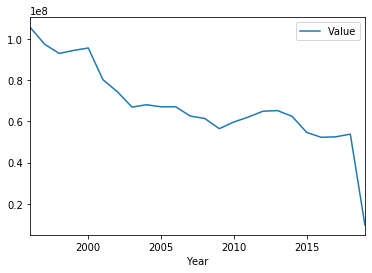

In [23]:
road.groupby('Year')['Value'].sum().reset_index().plot(x='Year',y='Value')

1) How many people cross to United States from Canada on road?
    
There are total of 1625954879 people who travelled between 1996 January - 2018 December.   
We see a trend that passengers to US are decreasing over the years.  
In 2019, the data is collected until March so we see a line graph falling dramatically.
    
    In average:
        2.1 passengers per vehicle travlled to US between 1996 - 2018.  
        24 passengers per bus
    

# 2) Which cities from Canada travel down the most on road?

In [24]:
US_Canada_Border.groupby('State')['Value'].sum().sort_values(ascending=False).reset_index()

,State,Value
0,New York,827170661
1,Michigan,753167571
2,Washington,501550846
3,Maine,231249782
4,Vermont,114257813
5,Minnesota,95764039
6,North Dakota,75722499
7,Montana,54160434
8,Idaho,20998428
9,Alaska,13920348


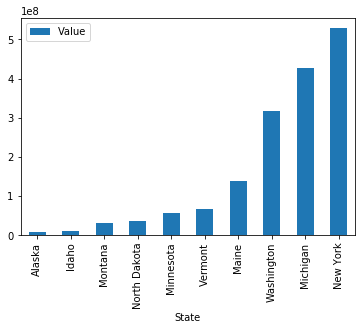

In [25]:
road.groupby('State')['Value'].sum().sort_values().reset_index().plot.bar('State','Value')

As we see in the bar graph, three states stand out for number of entrees to United States: New York, Michigan, and Washington. These three states are located under the most affluent provinces in Canada: Vancouver, Toronto, and Montreal. We will look closely to these three states.  

Toronto, Montreal and Vancouver provinces are where people travel down the most.

# 3) What is the percentage of Vancouver within Canada travelling down to US on road?

State
New York        32.526176
Michigan        26.290095
Washington      19.504660
Maine            8.492808
Vermont          4.181584
Minnesota        3.482492
North Dakota     2.288575
Montana          1.987012
Idaho            0.676403
Alaska           0.570195
Name: Value, dtype: float64

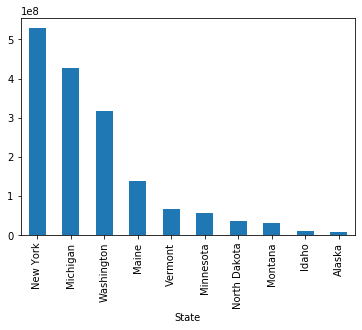

In [26]:
grouped = road.groupby("State")
Enter = grouped["Value"].agg('sum')
Enter.sort_values(ascending=False).plot.bar()

def find_percentage(df):
    return df["Value"].agg("sum")/road.Value.sum()*100
find_percentage(grouped).sort_values(ascending=False)

3) What are the percentage of people from Vancouver side travelling down to US from Canada on road?
    
    There are about 19.5% people travel to US from Canada on road between January 1996 - December 2018 from Vancouver

# 4) Which border stations did passengers use mostly from Vancouver?

In [27]:
# First find all the borders that are connected to Washington.
US_Canada_Border_Washington = road[road["State"] == "Washington"]
US_Canada_Border_Washington.sort_values(by=["Port Name","Date"]).head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Latitude,Longitude,Year
242120,Anacortes,Washington,3010,US-Canada Border,2003-01-01,Pedestrians,0,POINT (-122.61000000000001 48.51),48.51,-122.61000000000001,2003
242480,Anacortes,Washington,3010,US-Canada Border,2003-01-01,Personal Vehicle Passengers,0,POINT (-122.61000000000001 48.51),48.51,-122.61000000000001,2003
242727,Anacortes,Washington,3010,US-Canada Border,2003-01-01,Bus Passengers,0,POINT (-122.61000000000001 48.51),48.51,-122.61000000000001,2003
237799,Anacortes,Washington,3010,US-Canada Border,2003-04-01,Bus Passengers,0,POINT (-122.61000000000001 48.51),48.51,-122.61000000000001,2003
237847,Anacortes,Washington,3010,US-Canada Border,2003-04-01,Pedestrians,0,POINT (-122.61000000000001 48.51),48.51,-122.61000000000001,2003


In [28]:
# Find if all the date range are correlated with each other
def date_info(state):
    dates = US_Canada_Border_Washington[US_Canada_Border_Washington["Port Name"] == state]
    earliest = dates["Date"].min()
    latest = dates["Date"].max()
    print("{} border data collected from {} to {}".format(state,earliest,latest))

for state in US_Canada_Border_Washington["Port Name"].unique():
    date_info(state)

Lynden border data collected from 1996-01-01 00:00:00 to 2019-03-01 00:00:00
Sumas border data collected from 1996-01-01 00:00:00 to 2019-03-01 00:00:00
Nighthawk border data collected from 1996-01-01 00:00:00 to 2019-03-01 00:00:00
Oroville border data collected from 1996-01-01 00:00:00 to 2019-03-01 00:00:00
Port Angeles border data collected from 2003-01-01 00:00:00 to 2019-03-01 00:00:00
Frontier border data collected from 1996-01-01 00:00:00 to 2019-03-01 00:00:00
Danville border data collected from 1996-01-01 00:00:00 to 2019-03-01 00:00:00
Boundary border data collected from 1996-01-01 00:00:00 to 2019-03-01 00:00:00
Anacortes border data collected from 2003-01-01 00:00:00 to 2019-03-01 00:00:00
Point Roberts border data collected from 1996-01-01 00:00:00 to 2019-03-01 00:00:00
Metaline Falls border data collected from 1996-01-01 00:00:00 to 2019-03-01 00:00:00
Ferry border data collected from 1996-01-01 00:00:00 to 2019-03-01 00:00:00
Laurier border data collected from 1996-01-

Timeline:

    Lynden, Oroville, Ferry, Metaline Falls, Blaine, Frontier, Laurier, Boundary, Sumas, Danville, Nighthawk, Point Roberts: 1996 - 2018
    Port Angles, Anacortes : 2003 - 2018
    Friday Harbor: 2004- 2017
    
None of this data has 2019 information

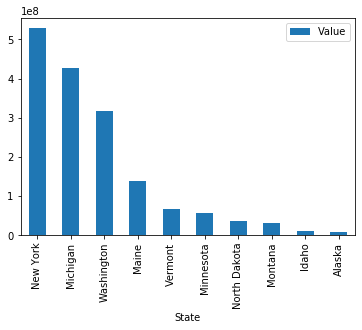

In [29]:
road.groupby('State').sum().reset_index().sort_values(by=('Value'),ascending=False).plot.bar(x='State',y='Value')

We see in the above graph that Washinton is in rank 3 for entering passengers from Canada. Washington state is where its connected with the province Vancouver in Canada. We will focus in Washington state and investigate the number of people entering from Vancouver.

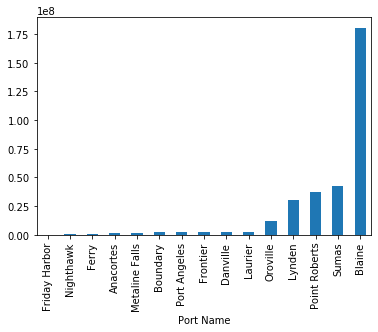

In [30]:
# Find the ratio of cross borders travelling to Washinton states
road_wash = road[road["State"] == "Washington"]

grouped2 = road_wash.groupby("Port Name")
Enter2 = grouped2["Value"].agg('sum').sort_values(ascending=True)
Enter2.plot.bar()

We see that Blaine, Sumas, Point Robers, and Lynden are the border stations that are used to enter US from Canada.  
Blaine border stations contributes outstandgly for passengers to travel down to Washington states, US.

In [31]:
def find_percentage(df):
    return df["Value"].agg("sum")/road_wash.Value.sum()*100

In [32]:
find_percentage(grouped2).sort_values(ascending=False)

Port Name
Blaine            56.931092
Sumas             13.463368
Point Roberts     11.817665
Lynden             9.493144
Oroville           3.733073
Laurier            0.747924
Danville           0.724900
Frontier           0.659420
Port Angeles       0.655748
Boundary           0.645781
Metaline Falls     0.466590
Anacortes          0.361822
Ferry              0.147314
Nighthawk          0.110994
Friday Harbor      0.041166
Name: Value, dtype: float64

In [33]:
road_wash.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Latitude,Longitude,Year
17,Lynden,Washington,3023,US-Canada Border,2019-03-01,Pedestrians,79,POINT (-122.44316000000002 48.94802),48.94802,-122.44316000000002,2019
122,Sumas,Washington,3009,US-Canada Border,2019-03-01,Personal Vehicle Passengers,128892,POINT (-122.26361 49.00028),49.00028,-122.26361,2019
162,Nighthawk,Washington,3011,US-Canada Border,2019-03-01,Personal Vehicle Passengers,555,POINT (-119.63537999999998 48.82366),48.82366,-119.63537999999998,2019
200,Oroville,Washington,3019,US-Canada Border,2019-03-01,Pedestrians,293,POINT (-119.43444 48.93917),48.93917,-119.43444,2019
212,Port Angeles,Washington,3007,US-Canada Border,2019-03-01,Bus Passengers,3,POINT (-123.43280000000001 48.11365),48.11365,-123.43280000000001,2019


In [34]:
van_borders = road_wash.drop_duplicates(['Port Name'])
location = van_borders[['Port Name','Latitude','Longitude']]

In [35]:
geo_df = van_borders.copy()
geo_df[['Latitude','Longitude']] = geo_df[['Latitude','Longitude']].astype('float')

In [36]:
geo_df.columns

Index(['Port Name', 'State', 'Port Code', 'Border', 'Date', 'Measure', 'Value',
       'Location', 'Latitude', 'Longitude', 'Year'],
      dtype='object')

In [37]:
map = folium.Map(location=[geo_df['Latitude'].mean(), geo_df['Longitude'].mean()], zoom_start=7)

for n in geo_df.index:
    # This is what will be seen on the marker pop up box
    popup_name = geo_df['Port Name'][n]
    # Different color for three cities  
    folium.map.Marker(
        location = [geo_df.loc[n, 'Latitude'], geo_df.loc[n, 'Longitude']],
        popup= folium.Popup(popup_name, parse_html=True),
        icon=folium.Icon(color='blue'),
     ).add_to(map)

map

<img src="vcrborder.jpg"/>

Four main border stations (91.71%) are used to travel down to Washington states from Vancouver, BC. They are Blaine, Lynden, Sumas, and Point Robers. Point Roberts is a territory of US that are surround by sea except on North, which is Canada. Thus, there are two options to travel to US mainland via ferry or via drive around to Canada and re-enter to states. In addition, there are Port Angeles, Friday Harbor and Anacortes Ferry border station that passengers enter via ferry. These three ferry bordor stations consider about 1.06% of passengers entering to US from Canada. Otherwise, rest of border stations are loacted near Alberta province, which Vancouver passengers won't likely to use.